<a href="https://colab.research.google.com/github/benniella/Ml-learning/blob/main/image%20recoginition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics --upgrade -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.8/978.8 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.4 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import zipfile, os
from google.colab import files

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
uploaded = files.upload()

Saving microwave detection.v2i.yolov8.zip to microwave detection.v2i.yolov8.zip


In [ ]:
import zipfile
file_path = next(iter(uploaded))
full_path = f"/content/{file_path}"

# Extract zip
with zipfile.ZipFile(full_path, 'r') as zip_ref:
    zip_ref.extractall("microwave_data")


In [ ]:
%cd microwave_data
!ls

/content/microwave_data
data.yaml  README.dataset.txt  README.roboflow.txt  train  valid


In [ ]:
!ls


data.yaml  README.dataset.txt  README.roboflow.txt  train  valid


In [ ]:
!find . -name data.yaml



./data.yaml


In [ ]:
!ls -R microwave_data


ls: cannot access 'microwave_data': No such file or directory


In [ ]:
%cd ../..



/


In [ ]:
!ls

bin			    kaggle		      opt		 sys
boot			    lib			      proc		 tmp
content			    lib32		      python-apt	 tools
cuda-keyring_1.1-1_all.deb  lib64		      python-apt.tar.xz  usr
datalab			    libx32		      root		 var
dev			    media		      run
etc			    mnt			      sbin
home			    NGC-DL-CONTAINER-LICENSE  srv


In [ ]:
!ls -R datasets


ls: cannot access 'datasets': No such file or directory


In [ ]:
!cp -r train valid


cp: cannot stat 'train': No such file or directory


In [ ]:
!mkdir -p datasets/train/images
!mkdir -p datasets/train/labels
!mkdir -p datasets/valid/images
!mkdir -p datasets/valid/labels


In [ ]:
!cp train/images/* datasets/train/images/
!cp train/labels/* datasets/train/labels/
!cp valid/images/* datasets/valid/images/
!cp valid/labels/* datasets/valid/labels/


cp: cannot stat 'train/images/*': No such file or directory
cp: cannot stat 'train/labels/*': No such file or directory
cp: cannot stat 'valid/images/*': No such file or directory
cp: cannot stat 'valid/labels/*': No such file or directory


In [ ]:
!mv data.yaml datasets/


mv: cannot stat 'data.yaml': No such file or directory


In [ ]:
!ls -R datasets


datasets:
train  valid

datasets/train:
images	labels

datasets/train/images:

datasets/train/labels:

datasets/valid:
images	labels

datasets/valid/images:

datasets/valid/labels:


In [ ]:
!cat datasets/data.yaml



cat: datasets/data.yaml: No such file or directory


In [ ]:

with open("datasets/data.yaml", "w") as f:
    f.write(
        "train: datasets/train/images\n"
        "val: datasets/valid/images\n"
        "nc: 1\n"
        "names: ['microwave']\n"
    )


In [ ]:
!cat datasets/data.yaml


train: datasets/train/images
val: datasets/valid/images
nc: 1
names: ['microwave']


In [ ]:
!mv data.yaml /content
!mv train /content
!mv valid /content


mv: cannot stat 'data.yaml': No such file or directory
mv: cannot stat 'train': No such file or directory
mv: cannot stat 'valid': No such file or directory


In [ ]:
%cd /
%cd content


/
/content


In [ ]:
!ls -R


.:
 microwave_data  'microwave detection.v2i.yolov8.zip'   sample_data

./microwave_data:
data.yaml  README.dataset.txt  README.roboflow.txt  train  valid

./microwave_data/train:
images	labels

./microwave_data/train/images:
microwave10_png.rf.540b0da0bbd6fc8599ff6d58d0b7f60c.jpg
microwave-11_png.rf.2bd8061e12cda535a2a2eafe8da5d814.jpg
microwave12_png.rf.7eac34966bc418f26222c82b0261cdd8.jpg
microwave13_png.rf.833203303a6b356590270b8675e405b2.jpg
microwave-1_png.rf.30fe66e3ded63e41628e9f9df16b3b25.jpg
microwave2_png.rf.e9e0e5985d7dd74957d551aaaf79fbdb.jpg
microwave3_png.rf.ee2a3ae31ffb8ac89dcb77496b8da520.jpg
microwave4_png.rf.14b8f91b13f823762f600b843b1c0bb3.jpg
microwave5_png.rf.cb6bf93bb213811e742d7691e0f03ae7.jpg
microwave7_png.rf.d1f6dd36bff502d7bce160697c1fffa5.jpg
microwave8_png.rf.fd6513412224867390bba030ab4b1d0b.jpg
microwave9_png.rf.2a9fb31db60a65c87b222d47ca30610a.jpg

./microwave_data/train/labels:
microwave10_png.rf.540b0da0bbd6fc8599ff6d58d0b7f60c.txt
microwave-11_png.rf.

In [ ]:
!mv microwave_data/data.yaml /content
!mv microwave_data/train /content
!mv microwave_data/valid /content


In [ ]:
!find /content -name "data.yaml"


/content/data.yaml


In [ ]:
!mkdir -p /content/final_dataset/train/images
!mkdir -p /content/final_dataset/train/labels
!mkdir -p /content/final_dataset/valid/images
!mkdir -p /content/final_dataset/valid/labels


In [ ]:
!cp /content/train/images/* /content/final_dataset/train/images/
!cp /content/train/labels/* /content/final_dataset/train/labels/
!cp /content/train/images/* /content/final_dataset/valid/images/
!cp /content/train/labels/* /content/final_dataset/valid/labels/


In [ ]:
!ls -R /content/final_dataset



/content/final_dataset:
train  valid

/content/final_dataset/train:
images	labels

/content/final_dataset/train/images:
microwave10_png.rf.540b0da0bbd6fc8599ff6d58d0b7f60c.jpg
microwave-11_png.rf.2bd8061e12cda535a2a2eafe8da5d814.jpg
microwave12_png.rf.7eac34966bc418f26222c82b0261cdd8.jpg
microwave13_png.rf.833203303a6b356590270b8675e405b2.jpg
microwave-1_png.rf.30fe66e3ded63e41628e9f9df16b3b25.jpg
microwave2_png.rf.e9e0e5985d7dd74957d551aaaf79fbdb.jpg
microwave3_png.rf.ee2a3ae31ffb8ac89dcb77496b8da520.jpg
microwave4_png.rf.14b8f91b13f823762f600b843b1c0bb3.jpg
microwave5_png.rf.cb6bf93bb213811e742d7691e0f03ae7.jpg
microwave7_png.rf.d1f6dd36bff502d7bce160697c1fffa5.jpg
microwave8_png.rf.fd6513412224867390bba030ab4b1d0b.jpg
microwave9_png.rf.2a9fb31db60a65c87b222d47ca30610a.jpg

/content/final_dataset/train/labels:
microwave10_png.rf.540b0da0bbd6fc8599ff6d58d0b7f60c.txt
microwave-11_png.rf.2bd8061e12cda535a2a2eafe8da5d814.txt
microwave12_png.rf.7eac34966bc418f26222c82b0261cdd8.txt
microwa

In [ ]:
!rm -rf /root/.config/Ultralytics


In [ ]:
with open("/content/data.yaml", "w") as f:
    f.write(
        "train: /content/final_dataset/train/images\n"
        "val: /content/final_dataset/valid/images\n"
        "nc: 1\n"
        "names: ['microwave']\n"
    )


In [ ]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")
model.train(data="/content/data.yaml", epochs=20, imgsz=640)










100%|██████████| 6.25M/6.25M [00:00<00:00, 73.0MB/s]


Ultralytics 8.3.110 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, forma

100%|██████████| 755k/755k [00:00<00:00, 14.6MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/final_dataset/train/labels... 12 images, 0 backgrounds, 0 corrupt: 100%|██████████| 12/12 [00:00<00:00, 229.17it/s]

train: New cache created: /content/final_dataset/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 863.9±266.0 MB/s, size: 29.4 KB)


val: Scanning /content/final_dataset/valid/labels... 12 images, 0 backgrounds, 0 corrupt: 100%|██████████| 12/12 [00:00<00:00, 1632.13it/s]

val: New cache created: /content/final_dataset/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G      1.137      2.582      1.573         30        640: 100%|██████████| 1/1 [00:12<00:00, 12.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.52s/it]

                   all         12         12    0.00333          1       0.18      0.076



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G      1.025      2.478      1.489         38        640: 100%|██████████| 1/1 [00:10<00:00, 10.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.40s/it]

                   all         12         12    0.00333          1      0.211     0.0946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G     0.9997      2.464      1.495         32        640: 100%|██████████| 1/1 [00:10<00:00, 10.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.74s/it]

                   all         12         12    0.00333          1      0.256      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20         0G     0.9981      2.526      1.556         29        640: 100%|██████████| 1/1 [00:10<00:00, 10.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.20s/it]

                   all         12         12    0.00333          1       0.61      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20         0G     0.8601      2.351      1.388         36        640: 100%|██████████| 1/1 [00:10<00:00, 10.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.23s/it]

                   all         12         12    0.00333          1      0.868      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20         0G      1.005      2.373      1.479         30        640: 100%|██████████| 1/1 [00:10<00:00, 10.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.22s/it]

                   all         12         12    0.00333          1      0.876       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20         0G     0.8142      2.288      1.401         28        640: 100%|██████████| 1/1 [00:10<00:00, 10.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.23s/it]

                   all         12         12    0.00333          1      0.836      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G     0.9837      2.226       1.53         29        640: 100%|██████████| 1/1 [00:10<00:00, 10.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.27s/it]

                   all         12         12    0.00333          1      0.834      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20         0G      0.785      1.964      1.335         35        640: 100%|██████████| 1/1 [00:11<00:00, 11.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.33s/it]

                   all         12         12    0.00333          1      0.869      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20         0G     0.8289      1.884      1.344         34        640: 100%|██████████| 1/1 [00:10<00:00, 10.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.84s/it]

                   all         12         12    0.00333          1      0.927      0.619


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20         0G     0.9191      2.377      1.685         12        640: 100%|██████████| 1/1 [00:09<00:00,  9.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.25s/it]

                   all         12         12    0.00333          1      0.976      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G     0.8202      2.251      1.472         12        640: 100%|██████████| 1/1 [00:09<00:00,  9.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.15s/it]

                   all         12         12    0.00333          1      0.983      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20         0G     0.8736      2.315      1.475         12        640: 100%|██████████| 1/1 [00:09<00:00,  9.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.79s/it]

                   all         12         12    0.00333          1      0.989      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20         0G     0.7137       2.14      1.504         12        640: 100%|██████████| 1/1 [00:10<00:00, 10.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.32s/it]

                   all         12         12    0.00333          1      0.995      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20         0G     0.5521      1.849      1.319         12        640: 100%|██████████| 1/1 [00:10<00:00, 10.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.32s/it]

                   all         12         12    0.00333          1      0.989       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20         0G     0.6739      1.879      1.398         12        640: 100%|██████████| 1/1 [00:10<00:00, 10.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.36s/it]

                   all         12         12    0.00333          1      0.995      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20         0G     0.5078       2.01      1.313         12        640: 100%|██████████| 1/1 [00:10<00:00, 10.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.25s/it]

                   all         12         12    0.00333          1      0.995      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20         0G     0.7298      1.936      1.508         12        640: 100%|██████████| 1/1 [00:11<00:00, 11.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.42s/it]

                   all         12         12    0.00333          1      0.995      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20         0G     0.5656      1.887      1.354         12        640: 100%|██████████| 1/1 [00:11<00:00, 11.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.40s/it]

                   all         12         12    0.00333          1      0.995      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20         0G      0.516      1.799      1.261         12        640: 100%|██████████| 1/1 [00:10<00:00, 10.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.39s/it]

                   all         12         12    0.00333          1      0.995      0.796



20 epochs completed in 0.082 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.110 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.43s/it]


                   all         12         12    0.00333          1      0.995      0.812
Speed: 2.4ms preprocess, 267.2ms inference, 0.0ms loss, 7.6ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fc6c1773d10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:

model.predict(source="/content/final_dataset/valid/images", save=True, conf=0.25)



image 1/12 /content/final_dataset/valid/images/microwave-11_png.rf.2bd8061e12cda535a2a2eafe8da5d814.jpg: 640x640 (no detections), 286.6ms
image 2/12 /content/final_dataset/valid/images/microwave-1_png.rf.30fe66e3ded63e41628e9f9df16b3b25.jpg: 640x640 (no detections), 278.0ms
image 3/12 /content/final_dataset/valid/images/microwave10_png.rf.540b0da0bbd6fc8599ff6d58d0b7f60c.jpg: 640x640 (no detections), 238.4ms
image 4/12 /content/final_dataset/valid/images/microwave12_png.rf.7eac34966bc418f26222c82b0261cdd8.jpg: 640x640 (no detections), 238.7ms
image 5/12 /content/final_dataset/valid/images/microwave13_png.rf.833203303a6b356590270b8675e405b2.jpg: 640x640 (no detections), 231.1ms
image 6/12 /content/final_dataset/valid/images/microwave2_png.rf.e9e0e5985d7dd74957d551aaaf79fbdb.jpg: 640x640 (no detections), 251.3ms
image 7/12 /content/final_dataset/valid/images/microwave3_png.rf.ee2a3ae31ffb8ac89dcb77496b8da520.jpg: 640x640 (no detections), 241.7ms
image 8/12 /content/final_dataset/valid/i

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'microwave'}
 obb: None
 orig_img: array([[[201, 210, 223],
         [201, 210, 223],
         [201, 210, 223],
         ...,
         [179, 194, 210],
         [179, 194, 210],
         [179, 194, 210]],
 
        [[201, 210, 223],
         [201, 210, 223],
         [201, 210, 223],
         ...,
         [179, 194, 210],
         [179, 194, 210],
         [179, 194, 210]],
 
        [[201, 210, 223],
         [201, 210, 223],
         [201, 210, 223],
         ...,
         [179, 194, 210],
         [179, 194, 210],
         [179, 194, 210]],
 
        ...,
 
        [[146, 173, 200],
         [144, 171, 198],
         [142, 169, 196],
         ...,
         [193, 207, 219],
         [193, 207, 219],
         [193, 207, 219]],
 
        [[146, 173, 200],
         [144, 171, 198],
         [142, 169, 196],
         ...,
         [193, 

In [ ]:
!ls /content/final_dataset/valid/images


microwave10_png.rf.540b0da0bbd6fc8599ff6d58d0b7f60c.jpg
microwave-11_png.rf.2bd8061e12cda535a2a2eafe8da5d814.jpg
microwave12_png.rf.7eac34966bc418f26222c82b0261cdd8.jpg
microwave13_png.rf.833203303a6b356590270b8675e405b2.jpg
microwave-1_png.rf.30fe66e3ded63e41628e9f9df16b3b25.jpg
microwave2_png.rf.e9e0e5985d7dd74957d551aaaf79fbdb.jpg
microwave3_png.rf.ee2a3ae31ffb8ac89dcb77496b8da520.jpg
microwave4_png.rf.14b8f91b13f823762f600b843b1c0bb3.jpg
microwave5_png.rf.cb6bf93bb213811e742d7691e0f03ae7.jpg
microwave7_png.rf.d1f6dd36bff502d7bce160697c1fffa5.jpg
microwave8_png.rf.fd6513412224867390bba030ab4b1d0b.jpg
microwave9_png.rf.2a9fb31db60a65c87b222d47ca30610a.jpg


In [ ]:
model.predict(source="/content/final_dataset/valid/images", save=True, conf=0.25)



image 1/12 /content/final_dataset/valid/images/microwave-11_png.rf.2bd8061e12cda535a2a2eafe8da5d814.jpg: 640x640 (no detections), 242.1ms
image 2/12 /content/final_dataset/valid/images/microwave-1_png.rf.30fe66e3ded63e41628e9f9df16b3b25.jpg: 640x640 (no detections), 241.9ms
image 3/12 /content/final_dataset/valid/images/microwave10_png.rf.540b0da0bbd6fc8599ff6d58d0b7f60c.jpg: 640x640 (no detections), 249.4ms
image 4/12 /content/final_dataset/valid/images/microwave12_png.rf.7eac34966bc418f26222c82b0261cdd8.jpg: 640x640 (no detections), 227.0ms
image 5/12 /content/final_dataset/valid/images/microwave13_png.rf.833203303a6b356590270b8675e405b2.jpg: 640x640 (no detections), 237.1ms
image 6/12 /content/final_dataset/valid/images/microwave2_png.rf.e9e0e5985d7dd74957d551aaaf79fbdb.jpg: 640x640 (no detections), 236.3ms
image 7/12 /content/final_dataset/valid/images/microwave3_png.rf.ee2a3ae31ffb8ac89dcb77496b8da520.jpg: 640x640 (no detections), 252.7ms
image 8/12 /content/final_dataset/valid/i

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'microwave'}
 obb: None
 orig_img: array([[[201, 210, 223],
         [201, 210, 223],
         [201, 210, 223],
         ...,
         [179, 194, 210],
         [179, 194, 210],
         [179, 194, 210]],
 
        [[201, 210, 223],
         [201, 210, 223],
         [201, 210, 223],
         ...,
         [179, 194, 210],
         [179, 194, 210],
         [179, 194, 210]],
 
        [[201, 210, 223],
         [201, 210, 223],
         [201, 210, 223],
         ...,
         [179, 194, 210],
         [179, 194, 210],
         [179, 194, 210]],
 
        ...,
 
        [[146, 173, 200],
         [144, 171, 198],
         [142, 169, 196],
         ...,
         [193, 207, 219],
         [193, 207, 219],
         [193, 207, 219]],
 
        [[146, 173, 200],
         [144, 171, 198],
         [142, 169, 196],
         ...,
         [193, 

In [ ]:
!ls /content/runs/detect/train23


ls: cannot access '/content/runs/detect/train23': No such file or directory


In [ ]:
model.predict(source="/content/final_dataset/valid/images", save=True, conf=0.25)



image 1/12 /content/final_dataset/valid/images/microwave-11_png.rf.2bd8061e12cda535a2a2eafe8da5d814.jpg: 640x640 (no detections), 264.2ms
image 2/12 /content/final_dataset/valid/images/microwave-1_png.rf.30fe66e3ded63e41628e9f9df16b3b25.jpg: 640x640 (no detections), 255.7ms
image 3/12 /content/final_dataset/valid/images/microwave10_png.rf.540b0da0bbd6fc8599ff6d58d0b7f60c.jpg: 640x640 (no detections), 242.6ms
image 4/12 /content/final_dataset/valid/images/microwave12_png.rf.7eac34966bc418f26222c82b0261cdd8.jpg: 640x640 (no detections), 246.8ms
image 5/12 /content/final_dataset/valid/images/microwave13_png.rf.833203303a6b356590270b8675e405b2.jpg: 640x640 (no detections), 228.9ms
image 6/12 /content/final_dataset/valid/images/microwave2_png.rf.e9e0e5985d7dd74957d551aaaf79fbdb.jpg: 640x640 (no detections), 250.9ms
image 7/12 /content/final_dataset/valid/images/microwave3_png.rf.ee2a3ae31ffb8ac89dcb77496b8da520.jpg: 640x640 (no detections), 235.3ms
image 8/12 /content/final_dataset/valid/i

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'microwave'}
 obb: None
 orig_img: array([[[201, 210, 223],
         [201, 210, 223],
         [201, 210, 223],
         ...,
         [179, 194, 210],
         [179, 194, 210],
         [179, 194, 210]],
 
        [[201, 210, 223],
         [201, 210, 223],
         [201, 210, 223],
         ...,
         [179, 194, 210],
         [179, 194, 210],
         [179, 194, 210]],
 
        [[201, 210, 223],
         [201, 210, 223],
         [201, 210, 223],
         ...,
         [179, 194, 210],
         [179, 194, 210],
         [179, 194, 210]],
 
        ...,
 
        [[146, 173, 200],
         [144, 171, 198],
         [142, 169, 196],
         ...,
         [193, 207, 219],
         [193, 207, 219],
         [193, 207, 219]],
 
        [[146, 173, 200],
         [144, 171, 198],
         [142, 169, 196],
         ...,
         [193, 

In [ ]:
!find /content -name best.pt


/content/runs/detect/train/weights/best.pt


In [ ]:
from ultralytics import YOLO
model = YOLO("/content/runs/detect/train/weights/best.pt")



In [ ]:
model.predict(source="/content/final_dataset/valid/images", save=True, conf=0.25)



image 1/12 /content/final_dataset/valid/images/microwave-11_png.rf.2bd8061e12cda535a2a2eafe8da5d814.jpg: 640x640 (no detections), 239.5ms
image 2/12 /content/final_dataset/valid/images/microwave-1_png.rf.30fe66e3ded63e41628e9f9df16b3b25.jpg: 640x640 (no detections), 230.1ms
image 3/12 /content/final_dataset/valid/images/microwave10_png.rf.540b0da0bbd6fc8599ff6d58d0b7f60c.jpg: 640x640 (no detections), 229.5ms
image 4/12 /content/final_dataset/valid/images/microwave12_png.rf.7eac34966bc418f26222c82b0261cdd8.jpg: 640x640 (no detections), 249.6ms
image 5/12 /content/final_dataset/valid/images/microwave13_png.rf.833203303a6b356590270b8675e405b2.jpg: 640x640 (no detections), 230.4ms
image 6/12 /content/final_dataset/valid/images/microwave2_png.rf.e9e0e5985d7dd74957d551aaaf79fbdb.jpg: 640x640 (no detections), 224.9ms
image 7/12 /content/final_dataset/valid/images/microwave3_png.rf.ee2a3ae31ffb8ac89dcb77496b8da520.jpg: 640x640 (no detections), 237.6ms
image 8/12 /content/final_dataset/valid/i

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'microwave'}
 obb: None
 orig_img: array([[[201, 210, 223],
         [201, 210, 223],
         [201, 210, 223],
         ...,
         [179, 194, 210],
         [179, 194, 210],
         [179, 194, 210]],
 
        [[201, 210, 223],
         [201, 210, 223],
         [201, 210, 223],
         ...,
         [179, 194, 210],
         [179, 194, 210],
         [179, 194, 210]],
 
        [[201, 210, 223],
         [201, 210, 223],
         [201, 210, 223],
         ...,
         [179, 194, 210],
         [179, 194, 210],
         [179, 194, 210]],
 
        ...,
 
        [[146, 173, 200],
         [144, 171, 198],
         [142, 169, 196],
         ...,
         [193, 207, 219],
         [193, 207, 219],
         [193, 207, 219]],
 
        [[146, 173, 200],
         [144, 171, 198],
         [142, 169, 196],
         ...,
         [193, 

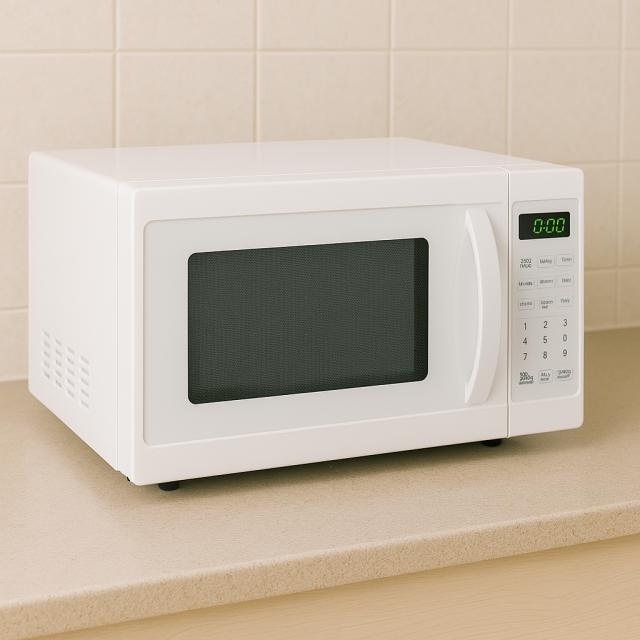

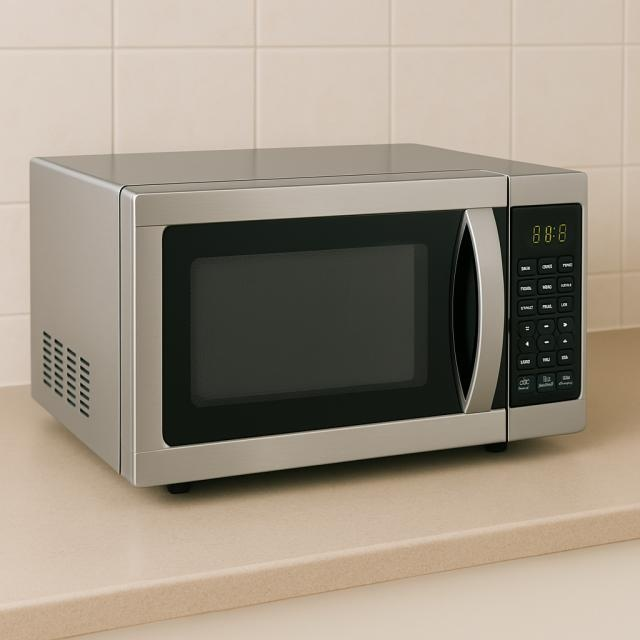

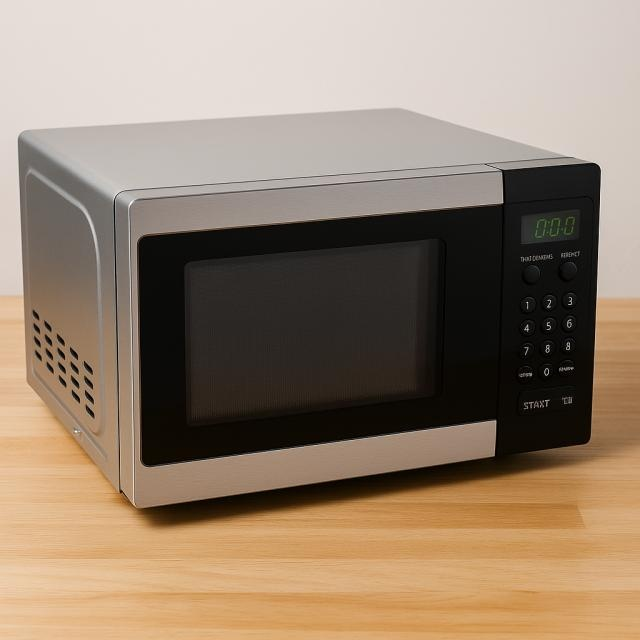

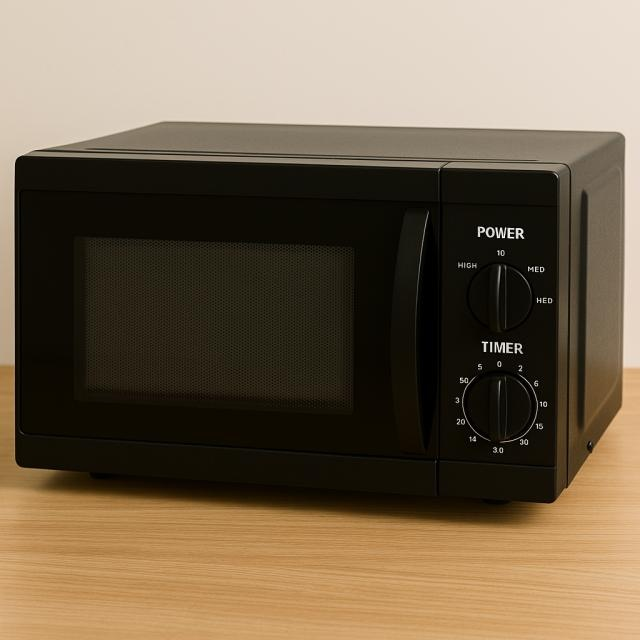

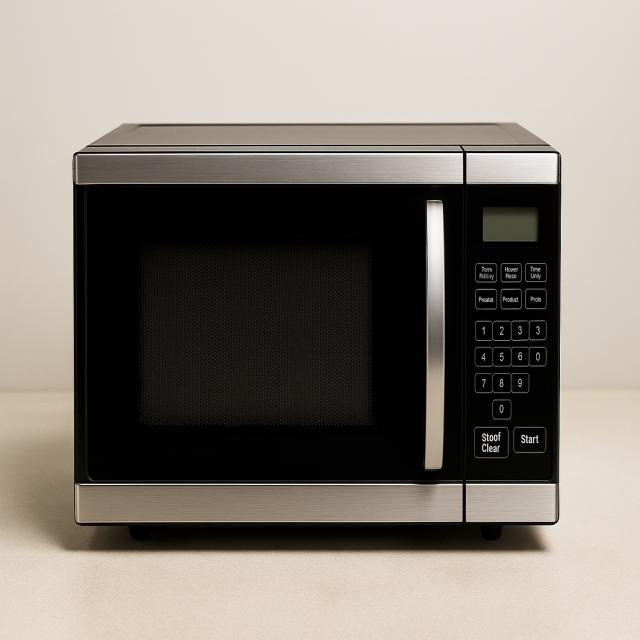

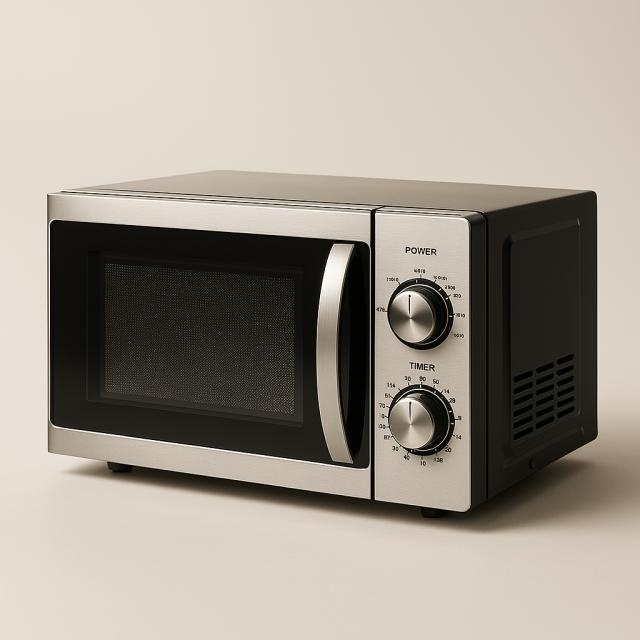

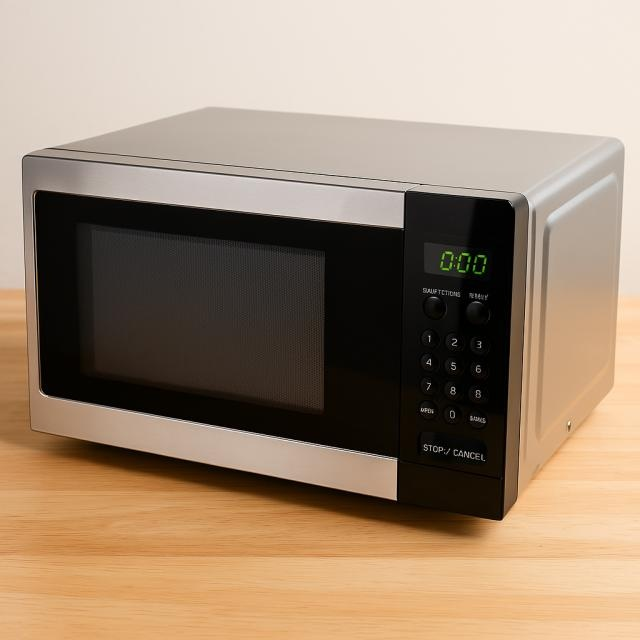

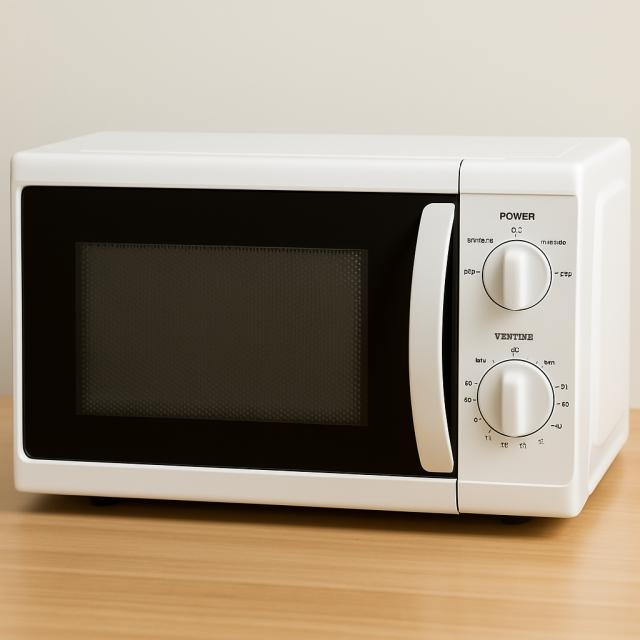

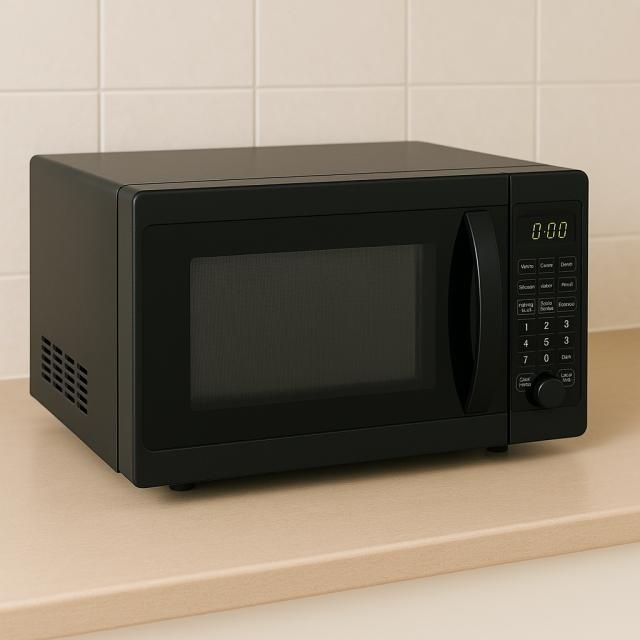

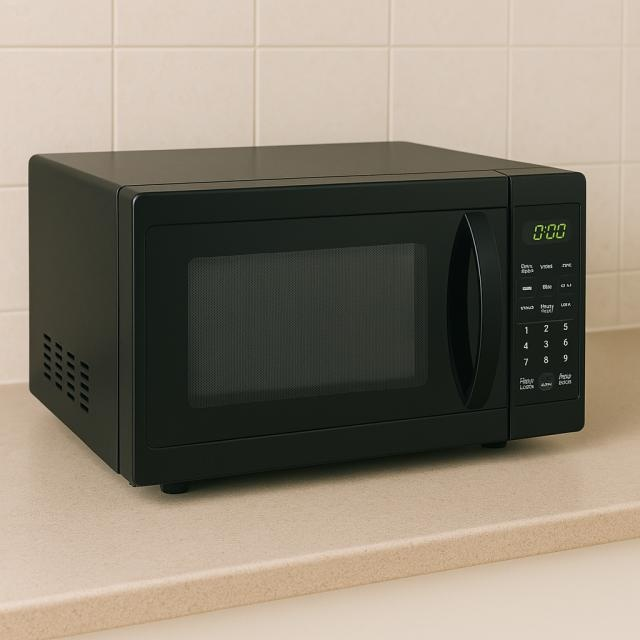

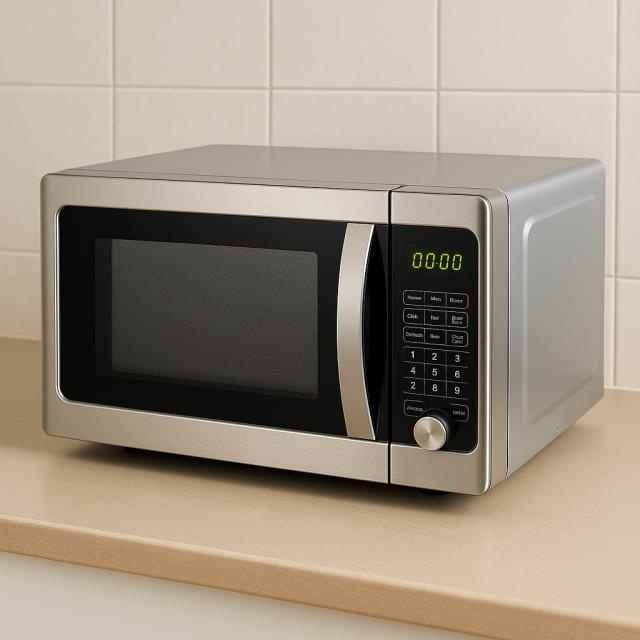

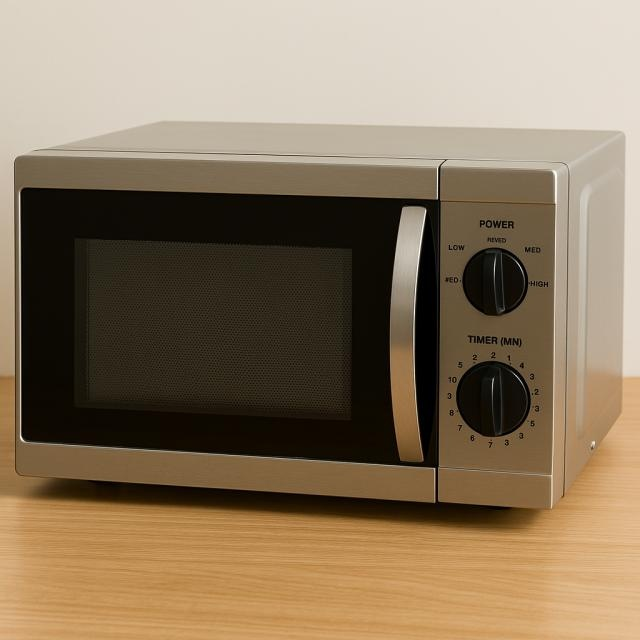

In [ ]:
import os
from IPython.display import Image, display

prediction_path = "/content/runs/detect/predict"
for filename in os.listdir(prediction_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        display(Image(filename=os.path.join(prediction_path, filename)))


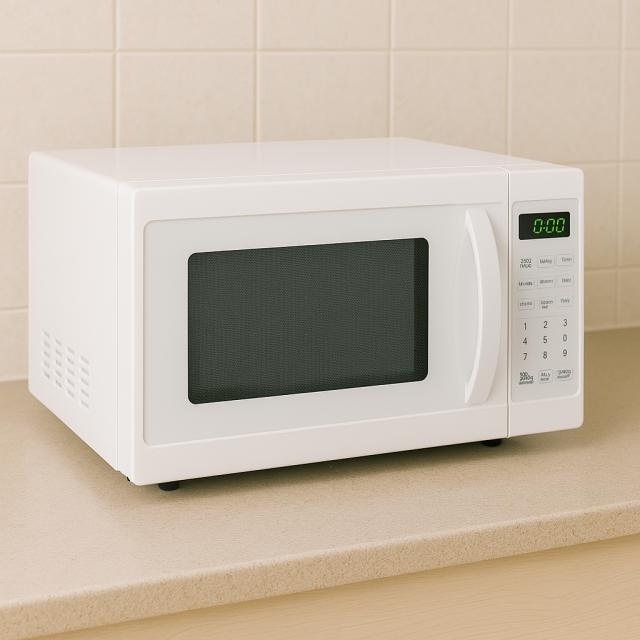

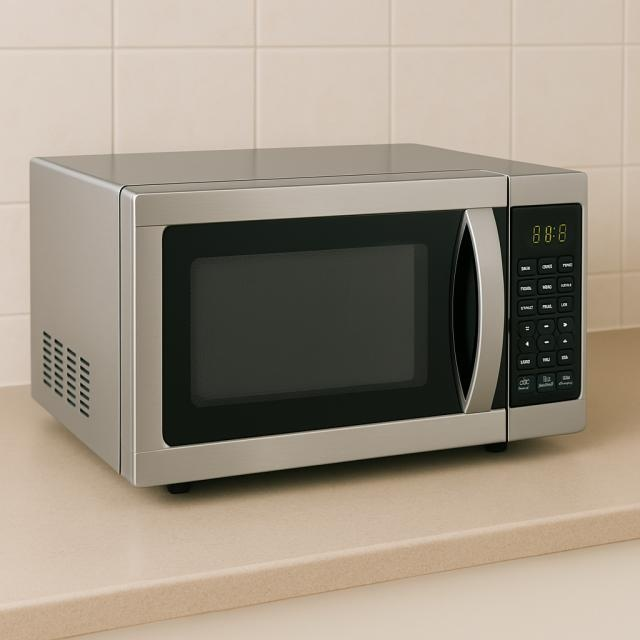

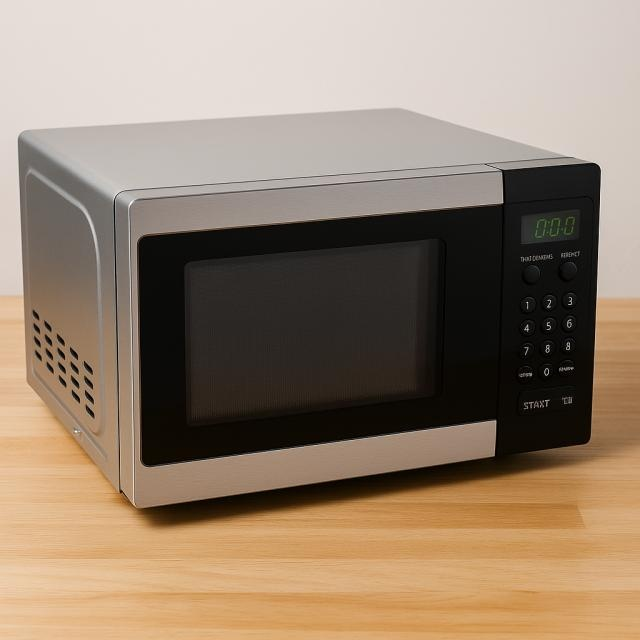

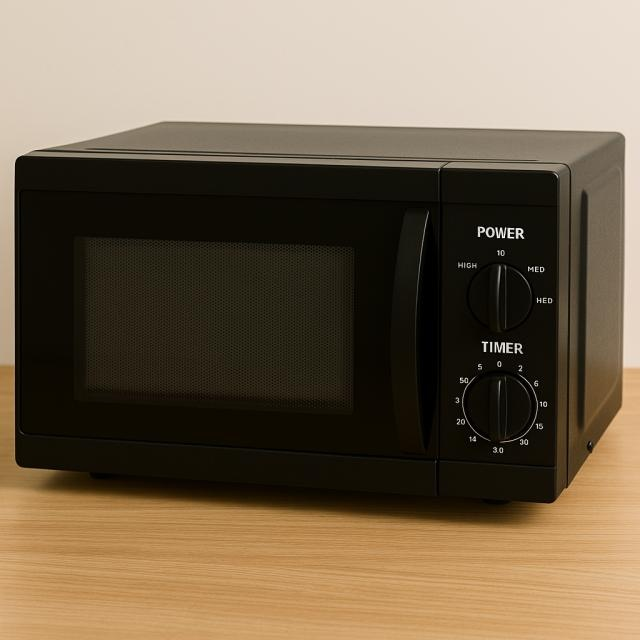

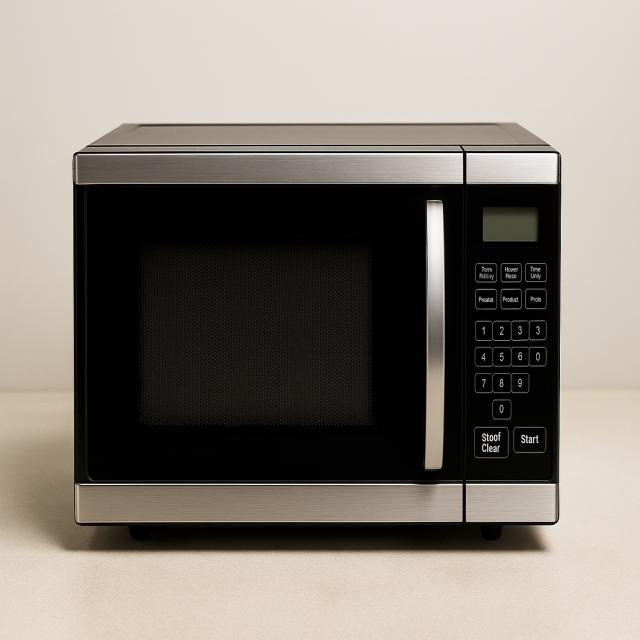

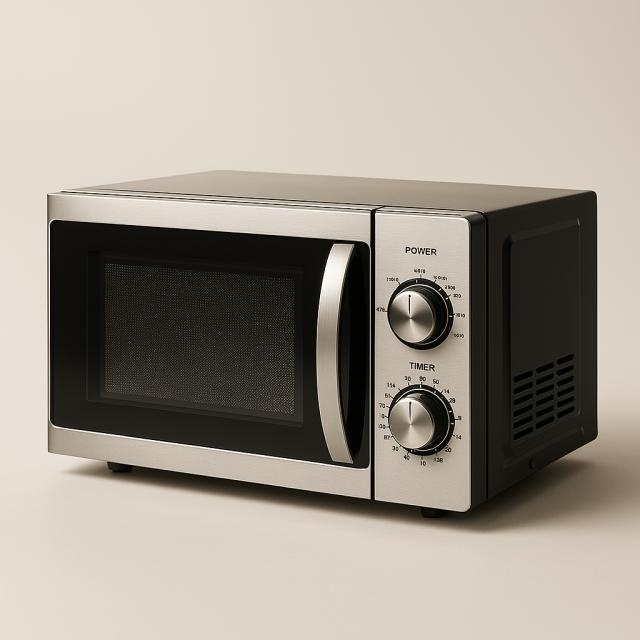

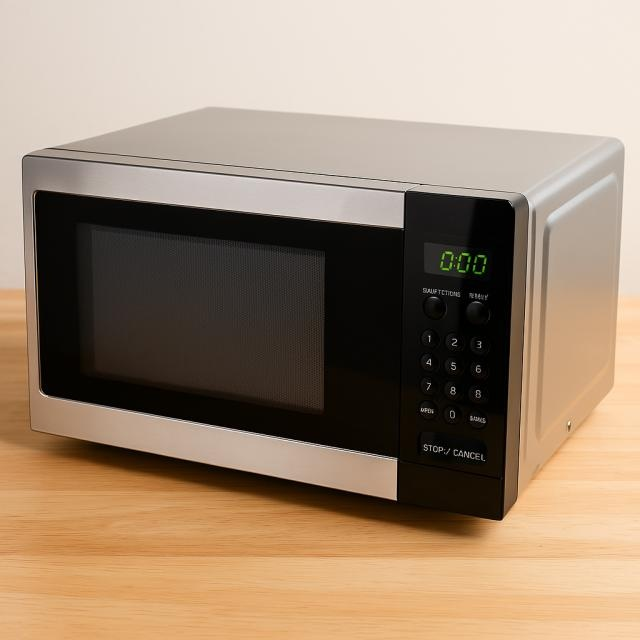

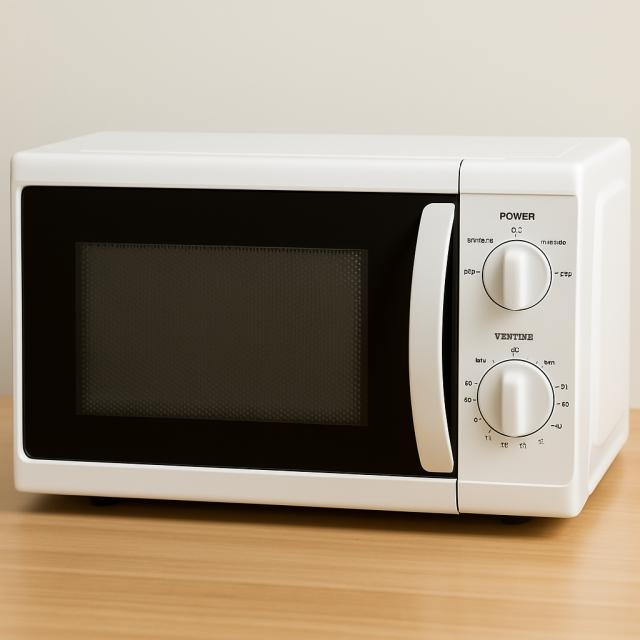

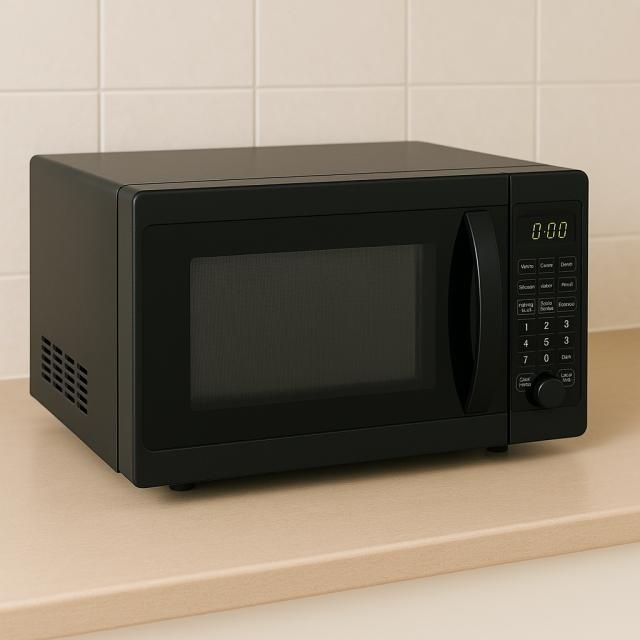

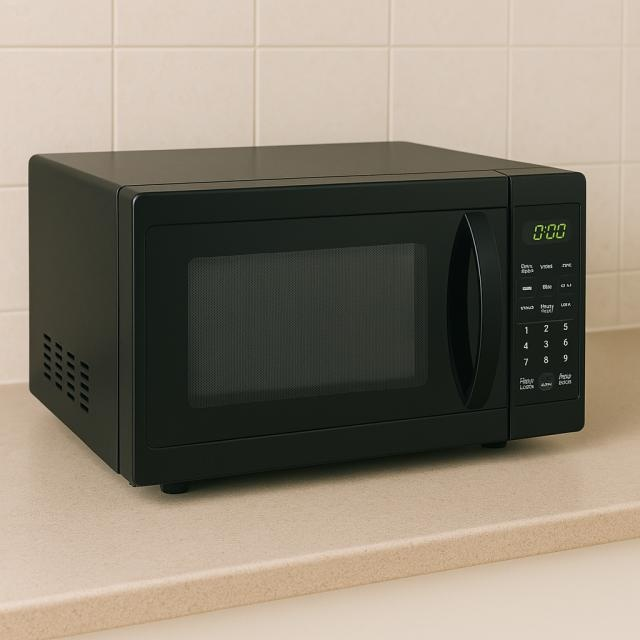

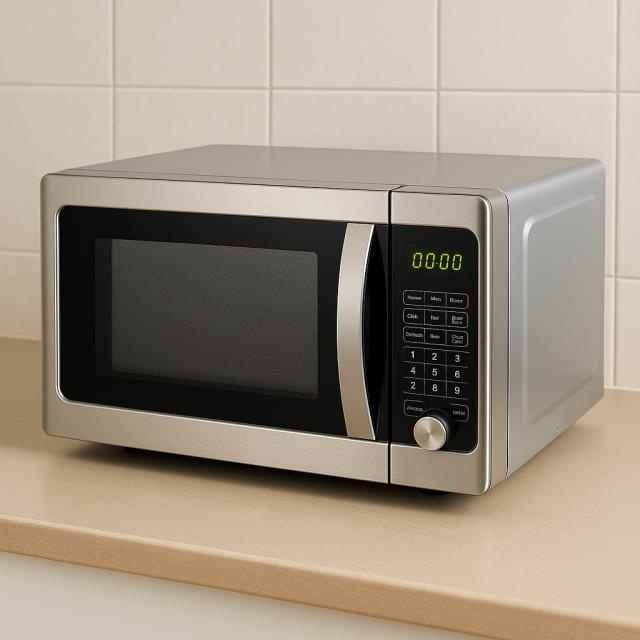

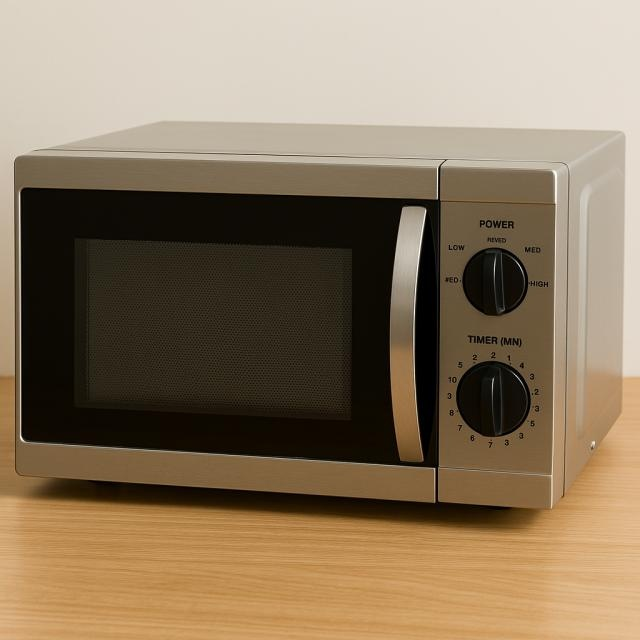

In [ ]:
import os
from IPython.display import Image, display

prediction_path = "/content/runs/detect/predict"
for filename in os.listdir(prediction_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        display(Image(filename=os.path.join(prediction_path, filename)))


In [ ]:
from google.colab import files

uploaded = files.upload()


Saving spoon.png to spoon.png


In [ ]:
model.predict(source="spoon.png", save=True, conf=0.25)



image 1/1 /content/spoon.png: 640x640 (no detections), 382.8ms
Speed: 8.6ms preprocess, 382.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'microwave'}
 obb: None
 orig_img: array([[[164, 176, 188],
         [166, 177, 190],
         [163, 177, 191],
         ...,
         [199, 213, 219],
         [199, 212, 220],
         [202, 212, 223]],
 
        [[164, 177, 190],
         [162, 178, 188],
         [164, 178, 188],
         ...,
         [201, 210, 219],
         [201, 212, 222],
         [202, 215, 219]],
 
        [[164, 177, 190],
         [166, 178, 187],
         [166, 179, 190],
         ...,
         [199, 210, 220],
         [202, 212, 220],
         [200, 210, 220]],
 
        ...,
 
        [[ 76, 103, 140],
         [ 74, 108, 137],
         [ 77, 109, 140],
         ...,
         [101, 138, 168],
         [104, 139, 170],
         [ 98, 139, 165]],
 
        [[ 79, 106, 137],
         [ 76, 106, 135],
         [ 81, 112, 141],
         ...,
         [ 95, 

In [ ]:
import os

predict_dir = "runs/detect"
print("Available prediction folders:")
print(os.listdir(predict_dir))


Available prediction folders:
['train5', 'train', 'train3', 'train2', 'predict', 'train4']


In [ ]:
import os

predict_dir = "runs/detect/predict"

if os.path.exists(predict_dir):
    print("✅ Prediction directory exists.")
    print("📂 Predicted files:")
    print(os.listdir(predict_dir))
else:
    print("❌ Prediction directory does not exist.")


✅ Prediction directory exists.
📂 Predicted files:
['microwave13_png.rf.833203303a6b356590270b8675e405b2.jpg', 'microwave-11_png.rf.2bd8061e12cda535a2a2eafe8da5d814.jpg', 'microwave5_png.rf.cb6bf93bb213811e742d7691e0f03ae7.jpg', 'microwave3_png.rf.ee2a3ae31ffb8ac89dcb77496b8da520.jpg', 'spoon.jpg', 'microwave8_png.rf.fd6513412224867390bba030ab4b1d0b.jpg', 'microwave7_png.rf.d1f6dd36bff502d7bce160697c1fffa5.jpg', 'microwave4_png.rf.14b8f91b13f823762f600b843b1c0bb3.jpg', 'microwave2_png.rf.e9e0e5985d7dd74957d551aaaf79fbdb.jpg', 'microwave10_png.rf.540b0da0bbd6fc8599ff6d58d0b7f60c.jpg', 'microwave12_png.rf.7eac34966bc418f26222c82b0261cdd8.jpg', 'microwave9_png.rf.2a9fb31db60a65c87b222d47ca30610a.jpg', 'microwave-1_png.rf.30fe66e3ded63e41628e9f9df16b3b25.jpg']


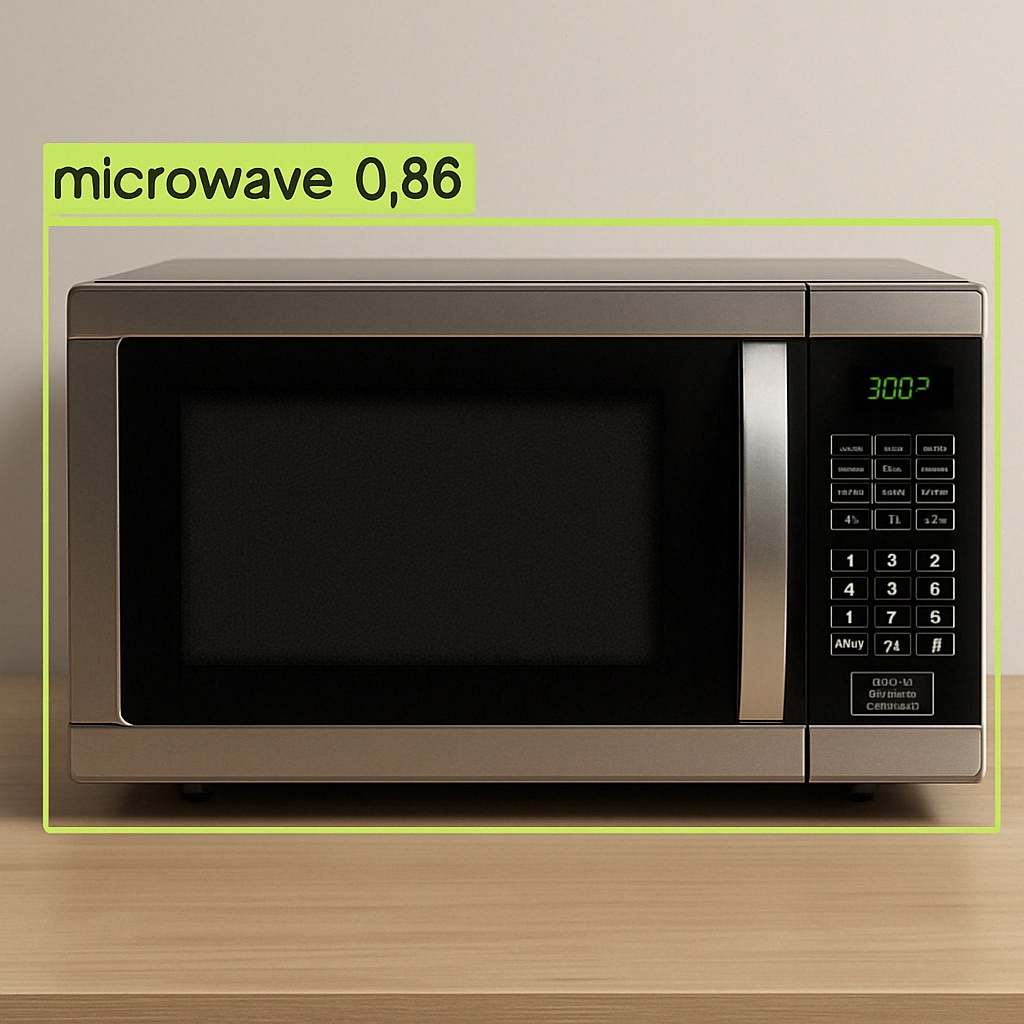

In [ ]:
from PIL import Image
from IPython.display import display

# Correct file path and extension
display(Image.open("runs/detect/predict/spoon.jpg"))


In [ ]:
# Load trained model
model = YOLO("/content/runs/detect/train/weights/best.pt")

# Set the image file to test
img_path = "microwave_086.png"

# Run prediction
results = model.predict(source=img_path, save=True, conf=0.25)

# Check if any microwave was detected
predictions = results[0].boxes

if predictions is None or len(predictions) == 0:
    print("❌ No microwave detected in this image.")
else:
    print(f"✅ Detected {len(predictions)} microwave(s).")
    # Show prediction image
    display(Image.open(f"runs/detect/predict/{img_path}"))



image 1/1 /content/microwave_086.png: 640x640 (no detections), 401.2ms
Speed: 12.8ms preprocess, 401.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3
❌ No microwave detected in this image.
